Interact.Slider{Float64}(Signal{Float64}(2.5, nactions=0),"x0",2.5,0.0:0.1:5.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"y0",0.0,-5.0:0.1:5.0,true)

Interact.Slider{Float64}(Signal{Float64}(7.5, nactions=0),"z0",7.5,-5.0:0.1:20.0,true)

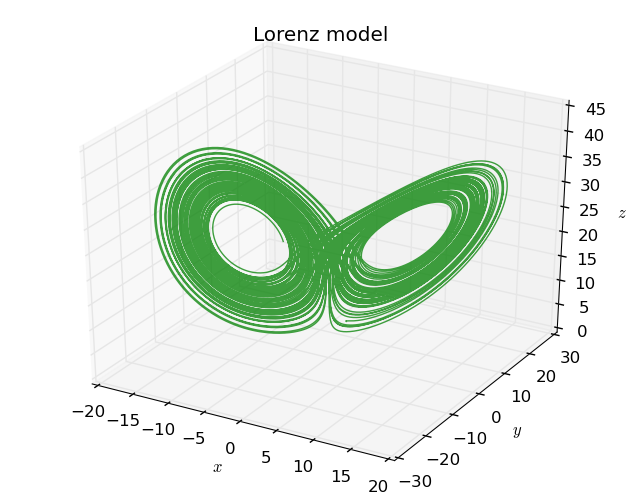

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in anonymous at In[7]:27
 in withfig at /home/fratava/.julia/v0.4/PyPlot/src/PyPlot.jl:639
 in anonymous at In[7]:13
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/fratava/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/fratava/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 13


In [7]:
#Pkg.add("Interact")
#Pkg.add("ODE")
#Pkg.add("PyPlot")


using Interact
using ODE
using PyPlot


g = figure()
#@manipulate for α=0:0.1:1.0,β=0:0.1:1.0,σ=0:0.1:1.0,γ=0:0.1:1.0,x0=0:0.1:5.0,y0=0:0.1:5.0; withfig(f) do 
@manipulate for x0=0.0:0.1:5.0,y0=-5.0:0.1:5.0,z0=-5.0:0.1:20.0; withfig(g) do 
    
        σ=10.0
        ρ=25.0
        β=8/3
        
        function f(t,y)   
            ydot=similar(y)    
            ydot[1]=σ*(-y[1]+y[2]) 
            ydot[2]=(ρ-y[3])*y[1]-y[2]
            ydot[3]=y[1]*y[2]-β*y[3]    
            ydot
        end

        t=[0:0.1:100]
        n=length(t)
        y0=[x0,y0,z0]
        t,y=ODE.ode23s(f,y0,t)
        y1=[a[1] for a in y]
        y2=[a[2] for a in y]
        y3=[a[3] for a in y]
        t=t[:,1] 
   
        PyPlot.plot3D(y1,y2,y3,"g-",alpha=0.75)
        #PyPlot.plot(y2,y1,"y-",alpha=0.75)
        #PyPlot.plot(y2,y3,"g-",alpha=0.75)
        #PyPlot.plot(y1,y2,"r-",alpha=0.75)
        PyPlot.grid(true)
        PyPlot.title("Lorenz model")
        PyPlot.xlabel(L"x")
        PyPlot.ylabel(L"y")
        PyPlot.zlabel(L"z")
        PyPlot.savefig("Lorenz.png")
        #PyPlot.show()
    end
end